In [3]:
#%cd pytorch_ssd

import torch
import torch.nn as nn
from torch.autograd import Variable
import numpy as np
import cv2
from ssd import build_ssd
from matplotlib import pyplot as plt
from data import VOC_CLASSES as voc_labels

In [4]:
build_ssd

<function ssd.build_ssd(phase, size=300, num_classes=21)>

Loading weights into state dict...
Finished!


C:\Users\tanak\anaconda3\envs\tanaka_env1\lib\site-packages\torch\nn\functional.py:780: UserWarning: Note that order of the arguments: ceil_mode and return_indices will changeto match the args list in nn.MaxPool2d in a future release.
  warnings.warn("Note that order of the arguments: ceil_mode and return_indices will change"
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:235: UserWarning: An output with one or more elements was resized since it had shape [28], which does not match the required output shape [6].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  torch.index_select(x1, 0, idx, out=xx1)
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:236: UserWarning: An output with one or more

C:\Users\tanak\pytorch_ssd\layers\box_utils.py:237: UserWarning: An output with one or more elements was resized since it had shape [143], which does not match the required output shape [117].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  torch.index_select(x2, 0, idx, out=xx2)
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:238: UserWarning: An output with one or more elements was resized since it had shape [143], which does not match the required output shape [117].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (

C:\Users\tanak\pytorch_ssd\layers\box_utils.py:236: UserWarning: An output with one or more elements was resized since it had shape [92], which does not match the required output shape [76].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  torch.index_select(y1, 0, idx, out=yy1)
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:237: UserWarning: An output with one or more elements was resized since it had shape [92], which does not match the required output shape [76].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Trig

C:\Users\tanak\pytorch_ssd\layers\box_utils.py:235: UserWarning: An output with one or more elements was resized since it had shape [51], which does not match the required output shape [46].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  torch.index_select(x1, 0, idx, out=xx1)
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:236: UserWarning: An output with one or more elements was resized since it had shape [51], which does not match the required output shape [46].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Trig

C:\Users\tanak\pytorch_ssd\layers\box_utils.py:238: UserWarning: An output with one or more elements was resized since it had shape [40], which does not match the required output shape [37].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  torch.index_select(y2, 0, idx, out=yy2)
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:235: UserWarning: An output with one or more elements was resized since it had shape [37], which does not match the required output shape [35].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Trig

C:\Users\tanak\pytorch_ssd\layers\box_utils.py:237: UserWarning: An output with one or more elements was resized since it had shape [29], which does not match the required output shape [27].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  torch.index_select(x2, 0, idx, out=xx2)
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:238: UserWarning: An output with one or more elements was resized since it had shape [29], which does not match the required output shape [27].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Trig

C:\Users\tanak\pytorch_ssd\layers\box_utils.py:236: UserWarning: An output with one or more elements was resized since it had shape [19], which does not match the required output shape [18].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  torch.index_select(y1, 0, idx, out=yy1)
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:237: UserWarning: An output with one or more elements was resized since it had shape [19], which does not match the required output shape [18].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Trig

C:\Users\tanak\pytorch_ssd\layers\box_utils.py:235: UserWarning: An output with one or more elements was resized since it had shape [12], which does not match the required output shape [10].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  torch.index_select(x1, 0, idx, out=xx1)
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:236: UserWarning: An output with one or more elements was resized since it had shape [12], which does not match the required output shape [10].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Trig

C:\Users\tanak\pytorch_ssd\layers\box_utils.py:238: UserWarning: An output with one or more elements was resized since it had shape [7], which does not match the required output shape [5].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  torch.index_select(y2, 0, idx, out=yy2)
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:235: UserWarning: An output with one or more elements was resized since it had shape [5], which does not match the required output shape [4].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggere

C:\Users\tanak\pytorch_ssd\layers\box_utils.py:237: UserWarning: An output with one or more elements was resized since it had shape [2], which does not match the required output shape [1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\Resize.cpp:24.)
  torch.index_select(x2, 0, idx, out=xx2)
C:\Users\tanak\pytorch_ssd\layers\box_utils.py:238: UserWarning: An output with one or more elements was resized since it had shape [2], which does not match the required output shape [1].This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggere

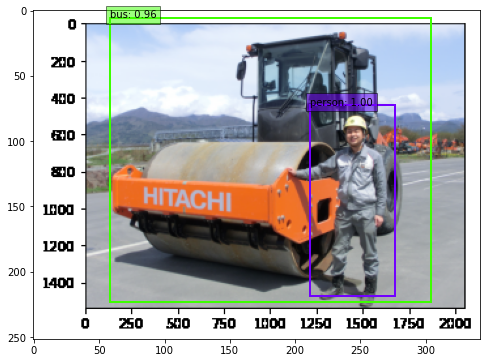

In [6]:
# SSDネットワークを定義し、学習済みパラメータを読み込む
net = build_ssd('test', 300, 21)   
net.load_weights('./weights/ssd300_mAP_77.43_v2.pth')
#net = net.to(device)

# 物体検出関数 
def detect(image, labels):

    # 画像を(1,3,300,300)のテンソルに変換
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    x = cv2.resize(image, (300, 300)).astype(np.float32)  
    x -= (104.0, 117.0, 123.0)
    x = x.astype(np.float32)
    x = x[:, :, ::-1].copy()
    x = torch.from_numpy(x).permute(2, 0, 1)  
    xx = Variable(x.unsqueeze(0))    
     
    # 順伝播を実行し、推論結果を出力
    if torch.cuda.is_available():
        xx = xx.cuda()
    y = net(xx)

    # 表示設定 
    plt.figure(figsize=(8,8))
    colors = plt.cm.hsv(np.linspace(0, 1, 21)).tolist()
    plt.imshow(rgb_image)
    currentAxis = plt.gca()

    # 推論結果をdetectionsに格納
    detections = y.data
    # 各検出のスケールのバックアップ
    scale = torch.Tensor(rgb_image.shape[1::-1]).repeat(2)
    
    # バウンディングボックスとクラス名を表示
    for i in range(detections.size(1)):
        j = 0
        # 確信度confが0.6以上のボックスを表示
        # jは確信度上位200件のボックスのインデックス
        # detections[0,i,j]は[conf,xmin,ymin,xmax,ymax]の形状
        while detections[0,i,j,0] >= 0.6:
            score = detections[0,i,j,0]
            label_name = labels[i-1]
            display_txt = '%s: %.2f'%(label_name, score)
            pt = (detections[0,i,j,1:]*scale).cpu().numpy()
            coords = (pt[0], pt[1]), pt[2]-pt[0]+1, pt[3]-pt[1]+1
            color = colors[i]
            currentAxis.add_patch(plt.Rectangle(*coords, fill=False, edgecolor=color, linewidth=2))
            currentAxis.text(pt[0], pt[1], display_txt, bbox={'facecolor':color, 'alpha':0.5})
            j+=1
    plt.show()
    plt.close()
    return detections

# 物体検出実行
file = 'C:/Users/tanak/Downloads/demo1.png'
image = cv2.imread(file, cv2.IMREAD_COLOR) 
detections = detect(image, voc_labels)